# Big Data Analysis



 **META project data:**

*   **Project customer:** IT School "GoIT"
*   **Project name:** Stack overflow software developer survey analysis (The final project of the Python block)
*   **Project goal:** Working with large datasets, descriptive statistics and data visualization.
*   **DataSet Name:** Stack Overflow Developer Survey 2025
*   **Project contractor:** Isachenko Andrii Junior Data Analyst
*   **Tools:**
Python (Pandas, NumPy, MatPlotLib, SeaBorn),
Jupyter Notebook, Goole Colab
*   **Data received date:** 2026-02-02
*   **Analysis completion date:** 2026-02-08




**Introduction and Data Description**  
This analysis is based on the results of the annual Stack Overflow Developer Survey 2025 — one of the largest and most comprehensive surveys in the IT world. The data covers over 49,000 developers from different parts of the world, providing a unique opportunity to explore the current state of the technology market.  
  
**The following files were used for the work:**  
  
**survey_results_public.csv** — the main data set containing anonymous responses from respondents (income, technology stack, experience, type of employment).  
  
**survey_results_schema.csv** — an auxiliary reference file containing the full texts of the questions for each column of the dataset.  
  
**2025_Developer_Survey_Tool.pdf** — a description of the questionnaire structure and the logic of conducting the survey.

0. Importing python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Data acquisition

In [2]:
# Loading data from CSV files (pre-upload the dataset to Google Drive and provide access for Google Colab):
# Adding links to data files
srp_df_url = '/content/drive/MyDrive/ISAO/data/survey_results_public.csv'


# srp - shortened from survey_results_public
srs_df_url = '/content/drive/MyDrive/ISAO/data/survey_results_schema.csv'
# srs - shortened from survey_results_schema

# Downloading data for further analysis
srp_df = pd.read_csv(srp_df_url, encoding='utf-8', low_memory=False)
# srp - shortened from survey_results_public
srs_df = pd.read_csv(srs_df_url, encoding='utf-8')
# srs - shortened from survey_results_schema

In [3]:
# Checking the result
# Retrieve data from survey_results_schema
srs_df.head()

,qid,qname,question,type,sub,sq_id
0,QID18,TechEndorse_1,What attracts you to a technology or causes yo...,RO,AI integration or AI Agent capabilities,1.0
1,QID18,TechEndorse_2,What attracts you to a technology or causes yo...,RO,Easy-to-use API,2.0
2,QID18,TechEndorse_3,What attracts you to a technology or causes yo...,RO,Robust and complete API,3.0
3,QID18,TechEndorse_4,What attracts you to a technology or causes yo...,RO,Customizable and manageable codebase,4.0
4,QID18,TechEndorse_5,What attracts you to a technology or causes yo...,RO,Reputation for quality,5.0


In [4]:
# Checking the result
# Retrieve data from survey_results_public
srp_df.head()

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0


In [6]:
# Checking the number of rows and columns loaded (data array size)
print(f"DataFrame size rows, columns: {srp_df.shape}")

DataFrame size rows, columns: (49191, 172)


We conclude that the dataset was loaded successfully.

**2. Data Preparation and Cleaning**
An important part of this study is the data cleaning stage. Since the data was collected through an open-ended survey, it needed to be normalized before analysis.

**Export:** Create a cleaned file, survey_results_cleaned.csv, to ensure reproducibility of results.

In [7]:
# We delete identical lines if they exist.
srp_df = srp_df.drop_duplicates()

# List of columns, where we DO NOT want to change the register (if we miss the mark)
special_cols = ['LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith']

# Processing all text columns
text_columns = srp_df.select_dtypes(include=['object']).columns

for col in text_columns:
   # Remove spaces for ALL text columns
    srp_df[col] = srp_df[col].str.strip()

    # If the column is NOT in the special list, use Capitalize
    if col not in special_cols:
        srp_df[col] = srp_df[col].str.capitalize()

print("Basic cleaning completed: duplicates, spaces removed, case standardized.")

Basic cleaning completed: duplicates, spaces removed, case standardized.


In [8]:
# Saving cleared data
srp_df.to_csv('survey_results_cleaned.csv', index=False)

print(f"The normalized dataset is saved in'survey_results_cleaned.csv'")

The normalized dataset is saved in'survey_results_cleaned.csv'


3. We are analyzing the data

3.1 We cover the total number of respondents

In [9]:
# The number of respondents is covered and the result is displayed
num_respondents = srp_df['ResponseId'].nunique()
print("Number of respondents:", num_respondents)

Number of respondents: 49191


3.2 Analysis of the recurrence of respondents’ responses

In [10]:
# We can extract the food list from the file
qnames = set(srs_df["qname"].dropna().unique())

# We know the span of the columns by 'qnames', both in the scheme and in the sample itself
available_questions = qnames.intersection(set(srp_df.columns))

# You can see the rows with blanks in the selected columns
filtered = srp_df[list(available_questions)].dropna()

# We appreciate the number of respondents without gaps
result = filtered.shape[0]
print("Number of respondents who contributed to all meals:", result)

Number of respondents who contributed to all meals: 0


3.3 Statistical analysis of respondents’ information

In [11]:
# Let's remove gaps
workexp = srp_df["WorkExp"].dropna()
# The number format is translated and re-checked to ensure that no gaps appear after conversion
workexp = pd.to_numeric(workexp, errors="coerce").dropna()

# Calculable statistical indicators
mean = round(workexp.mean(), 2) #immediately rounded up
median = workexp.median()
mode = workexp.mode().iloc[0]

# The result is displayed
print("Statistical analysis of respondents' data:")
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')

Statistical analysis of respondents' data:
Mean: 13.37
Median: 10.0
Mode: 10.0


Let's create a graph of the distribution of respondents' experience.

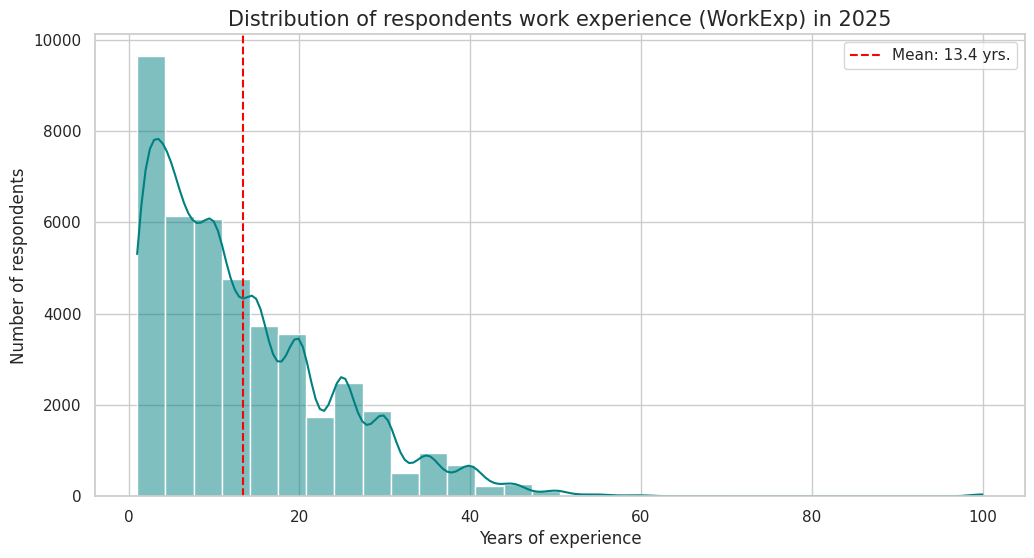

In [12]:
# Style settings
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Graph construction
sns.histplot(srp_df['WorkExp'].dropna(), bins=30, kde=True, color='teal')

plt.title('Distribution of respondents work experience (WorkExp) in 2025', fontsize=15)
plt.xlabel('Years of experience', fontsize=12)
plt.ylabel('Number of respondents', fontsize=12)

mean_exp = srp_df['WorkExp'].mean()
plt.axvline(mean_exp, color='red', linestyle='--', label=f'Mean: {mean_exp:.1f} yrs.')
plt.legend()

# Save the graph as a file
plt.savefig('work_experience_dist.png', dpi=300, bbox_inches='tight')

# Display (called after saving)
plt.show()

3.4 Remote work analysis

In [13]:
# We filter only those who work remotely
remote_workers = srp_df[srp_df["RemoteWork"].str.contains("remote", case=False, na=False)]
count_remote = remote_workers.shape[0]

# We output the result
print(f'Number of respondents who work remotely: {count_remote}')

Number of respondents who work remotely: 17663


3.5 We are building a schedule for the distribution of work formats among respondents

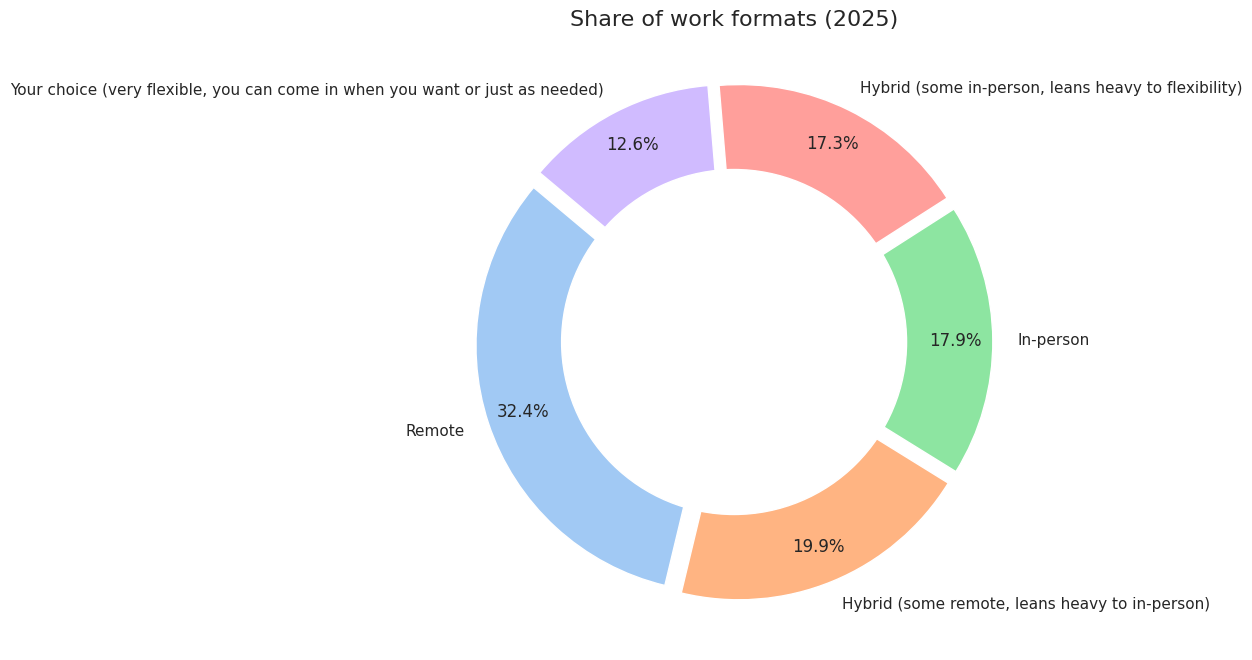

In [14]:
# Data preparation
work_format_counts = srp_df['RemoteWork'].value_counts()

# Checking whether there is data for construction
if work_format_counts.empty:
    print("There is no data in the 'RemoteWork' column.")
else:
    labels = work_format_counts.index
    values = work_format_counts.values

    # DYNAMIC SETTINGS:
    # Create an 'explode' list of the same length as the number of categories
    explode = [0.05] * len(values)

    # We create a color palette exactly according to the number of values
    colors = sns.color_palette('pastel', len(values))

    plt.figure(figsize=(8, 8))

    # Building a diagram
    plt.pie(values,
            labels=labels,
            autopct='%1.1f%%',
            startangle=140,
            colors=colors,
            pctdistance=0.85,
            explode=explode) # Now the length is always correct

    # Transforming Pie у Donut
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.title('Share of work formats (2025)', fontsize=16)

    # Preservation
    plt.savefig('remote_work_pie_chart.png', dpi=300, bbox_inches='tight')
    plt.show()

3.6 Determining Python popularity

In [31]:
# Identify respondents who have Python in their list of programming languages
python_langs = srp_df["LanguageHaveWorkedWith"].str.contains("Python", case=False, na=False)

# Calculating the percentage
percent_python = round((python_langs.sum() / len(srp_df)) * 100, 1)

# Output the result
print(f"Percentage of respondents who program in Python: {percent_python}%")

Percentage of respondents who program in Python: 37.5%


3.7 Analysis of ways to learn programming

In [32]:
# Applying a mask
mask_online = srp_df["LearnCode"].str.contains("Online course", case=False, na=False)

# Filter only those who studied through online courses
online_learners = srp_df[mask_online]

# Are counting the number of such respondents.
count_learners = online_learners.shape[0]

# Output the result
print(f"Number of respondents who studied through online courses: {count_learners}")

Number of respondents who studied through online courses: 21212


3.8 Geographic analysis of Python developer compensation

In [17]:
total_res = len(srp_df)
salary_df = srp_df.dropna(subset=['ConvertedCompYearly']).copy()
with_salary = len(salary_df)
missing_salary = total_res - with_salary
percent_missing = (missing_salary / total_res) * 100

print(f"DATA REPORT:")
print(f"Total respondents: {total_res}")
print(f"Income indicated: {with_salary}")
print(f"Income not stated: {missing_salary} ({percent_missing:.1f}%)")
print("-" * 30)

# Detecting and Saving Outliers
low_limit, high_limit = salary_df['ConvertedCompYearly'].quantile([0.01, 0.99])

# Creating a DF with outliers
outliers_df = salary_df[(salary_df['ConvertedCompYearly'] < low_limit) |
                        (salary_df['ConvertedCompYearly'] > high_limit)].copy()

print("WARNING: Suspicious data (Outliers) found.")
print("This list needs further analysis as the values ​​may be erroneous or jokes.")

# Save outliers for future stage: Root Cause Analysis of anomalies
outliers_df.to_csv('salary_outliers.csv', index=False)
print(f"List of outliers saved to file 'salary_outliers.csv' ({len(outliers_df)} lines).")
print("-" * 50)

# Display the Top 10 suspicious values ---
print("TOP 10 EXTREMELY HIGH SALARIES:")
display(outliers_df.sort_values(by='ConvertedCompYearly', ascending=False)[['Country', 'ConvertedCompYearly']].head(10))

print("\n TOP 10 EXTREMELY LOW SALARIES:")
display(outliers_df.sort_values(by='ConvertedCompYearly', ascending=True)[['Country', 'ConvertedCompYearly']].head(10))
print("-" * 50)

DATA REPORT:
Total respondents: 49191
Income indicated: 23947
Income not stated: 25244 (51.3%)
------------------------------
This list needs further analysis as the values ​​may be erroneous or jokes.
List of outliers saved to file 'salary_outliers.csv' (473 lines).
--------------------------------------------------
TOP 10 EXTREMELY HIGH SALARIES:


,Country,ConvertedCompYearly
34267,United states of america,50000000.0
28700,Ukraine,33552715.0
43143,Poland,18387548.0
35353,"Iran, islamic republic of...",15430267.0
45971,Netherlands,13921760.0
48428,Ukraine,10000000.0
24900,India,9531653.0
10025,United states of america,9000000.0
37352,Ukraine,6890299.0
30728,Brazil,6371285.0



 TOP 10 EXTREMELY LOW SALARIES:


,Country,ConvertedCompYearly
90,India,1.0
4580,Germany,1.0
41682,Bulgaria,1.0
42078,Ethiopia,1.0
34865,Antigua and barbuda,1.0
5910,India,1.0
40168,United states of america,1.0
39051,Mexico,1.0
34567,China,1.0
28177,Colombia,1.0


--------------------------------------------------


To ensure the purity of the analysis, we divide the workflow into two stages: identifying outliers and excluding them from the main sample. This allows us to obtain a realistic median estimate of the job market for Python developers without the influence of incorrectly specified data.

In [33]:
# Removing outliers from the working dataset
salary_df_cleaned = salary_df[(salary_df['ConvertedCompYearly'] >= low_limit) &
                              (salary_df['ConvertedCompYearly'] <= high_limit)].copy()

# Filter out respondents who program in Python
python_srp_df = salary_df_cleaned[salary_df_cleaned["LanguageHaveWorkedWith"].str.contains("Python", case=False, na=False)].copy()

subset = python_srp_df[["Country", "ConvertedCompYearly"]].copy()

# Convert to numeric format and remove spaces
subset["ConvertedCompYearly"] = pd.to_numeric(subset["ConvertedCompYearly"], errors="coerce")
subset = subset.dropna(subset=["ConvertedCompYearly"])

# Group by country and calculate the mean and median
comp_stats = (
    subset
    .groupby("Country")["ConvertedCompYearly"]
    .agg(mean_compensation="mean", median_compensation="median")
    .reset_index()
)

# Rounding the value
comp_stats["mean_compensation"] = comp_stats["mean_compensation"].round(2)
comp_stats["median_compensation"] = comp_stats["median_compensation"].round(2)

# We output the result
print("Geographic analysis of Python developer compensation:")
comp_stats

Geographic analysis of Python developer compensation:


,Country,mean_compensation,median_compensation
0,Afghanistan,22328.67,1000.0
1,Albania,78688.33,67779.0
2,Algeria,20187.29,7088.0
3,Andorra,226103.50,226103.5
4,Argentina,49658.08,41800.0
...,...,...,...
147,"Venezuela, bolivarian republic of...",11226.67,6000.0
148,Viet nam,22602.64,9553.0
149,Yemen,32929.50,23672.0
150,Zambia,5424.25,3206.0


In [34]:
# Save the result to a separate CSV file
comp_stats.to_csv("python_comp_stats.csv", index=False, encoding="utf-8")
print("File successfully saved as python_comp_stats.csv")

File successfully saved as python_comp_stats.csv


Let's build a graph comparing the median and average salaries of Python developers by country

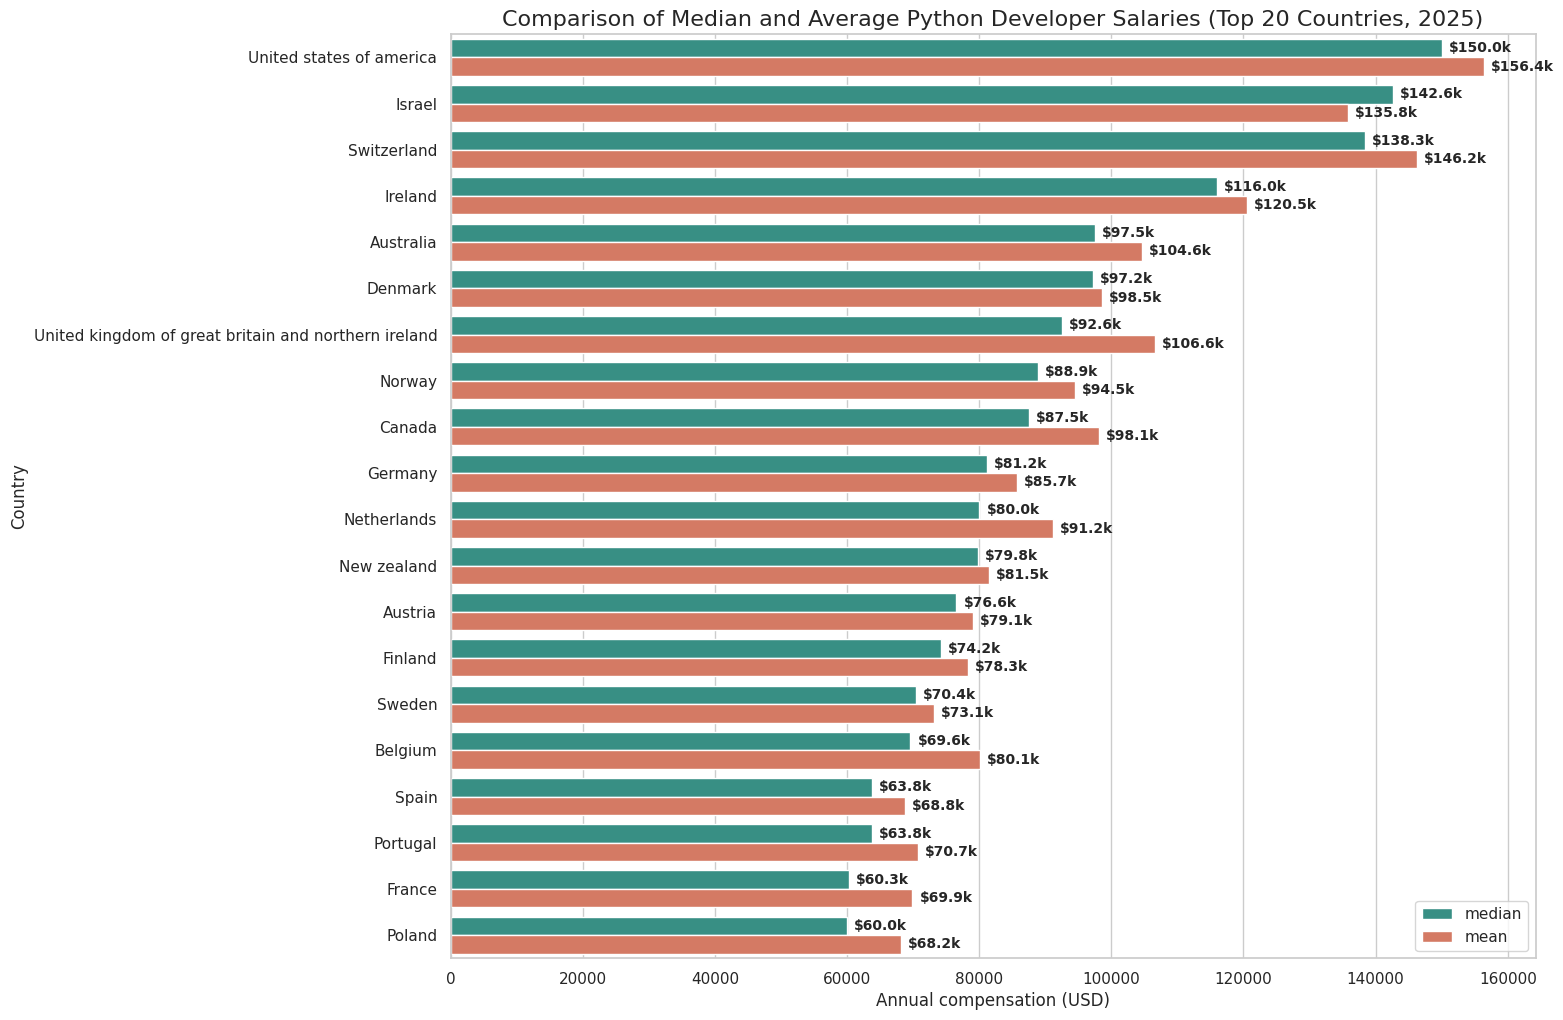

In [22]:
# Data preparation
python_devs = salary_df_cleaned[
    (salary_df_cleaned['LanguageHaveWorkedWith'].str.contains('Python', na=False)) &
    (salary_df_cleaned['ConvertedCompYearly'].notnull())
].copy()

# Filter by number of respondents (>50 for validity)
country_counts = python_devs['Country'].value_counts()
top_countries = country_counts[country_counts > 50].index
python_filtered = python_devs[python_devs['Country'].isin(top_countries)]

# Aggregation: calculate the Median and Mean simultaneously
stats = python_filtered.groupby('Country')['ConvertedCompYearly'].agg(['median', 'mean'])

# Sort by median and take the TOP-20
stats_sorted = stats.sort_values(by='median', ascending=False).head(20)

# Preparing for visualization (transforming the table for Seaborn)
# Convert Indices (Countries) into a column and expand metrics (median/mean) into a single column
stats_plot = stats_sorted.reset_index().melt(id_vars='Country', var_name='Metric', value_name='Salary')

# Graph construction
plt.figure(figsize=(14, 12))
sns.set_theme(style="whitegrid")

# Creating grouped columns
ax = sns.barplot(data=stats_plot,
                 y='Country',
                 x='Salary',
                 hue='Metric',
                 palette={'median': '#2a9d8f', 'mean': '#e76f51'})

# Adding value labels
for p in ax.patches:
    width = p.get_width()
    if width > 0: # Add text only if the column exists
        ax.annotate(f'${width/1000:.1f}k',
                    (width, p.get_y() + p.get_height() / 2.),
                    ha='left', va='center',
                    xytext=(5, 0),
                    textcoords='offset points',
                    fontsize=10, fontweight='bold')

plt.title('Comparison of Median and Average Python Developer Salaries (Top 20 Countries, 2025)', fontsize=16)
plt.xlabel('Annual compensation (USD)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.legend()

# Preservation
plt.savefig('python_median_vs_mean.png', dpi=300, bbox_inches='tight')
plt.show()

3.9 Analysis of the education of the highest paid specialists

In [23]:
# We are closing gaps in compensation and education
#srp_df_clean = srp_df.dropna(subset=["ConvertedCompYearly", "EdLevel"])

# Sort by compensation
srp_df_sorted = salary_df_cleaned.sort_values("ConvertedCompYearly", ascending=False)

# We select the top 10 respondents
srp_top_10 = srp_df_sorted.head(10)

# We output the result
srp_top_10_education = srp_top_10[["ConvertedCompYearly", "EdLevel", ]]
print("Education levels of TOP 10 respondents with the highest compensation:")
srp_top_10_education

Education levels of TOP 10 respondents with the highest compensation:


,ConvertedCompYearly,EdLevel
40867,440856.0,"Master’s degree (m.a., m.s., m.eng., mba, etc.)"
126,440856.0,Some college/university study without earning ...
13293,440000.0,"Professional degree (jd, md, ph.d, ed.d, etc.)"
20485,440000.0,"Master’s degree (m.a., m.s., m.eng., mba, etc.)"
26511,440000.0,"Bachelor’s degree (b.a., b.s., b.eng., etc.)"
45627,440000.0,"Bachelor’s degree (b.a., b.s., b.eng., etc.)"
22243,433975.0,"Master’s degree (m.a., m.s., m.eng., mba, etc.)"
12362,427300.0,"Bachelor’s degree (b.a., b.s., b.eng., etc.)"
39063,425000.0,"Bachelor’s degree (b.a., b.s., b.eng., etc.)"
14736,423454.0,"Professional degree (jd, md, ph.d, ed.d, etc.)"


4.0* Analysis of Python popularity by age category

In [25]:
srp_df = srp_df.copy()

# Creating a Boolean column: Does the respondent program in Python
srp_df["python_user"] = srp_df["LanguageHaveWorkedWith"].str.contains("Python", case=False, na=False)

# We are removing gaps in the age category
srp_df_clean = srp_df.dropna(subset=["Age"])

# We group by age categories.
srp_result = (
    srp_df_clean.groupby("Age")["python_user"]
    .mean() * 100
)

# Round and tabulate
srp_result = srp_result.round(1).reset_index(name="Percent_Python")

# We output the result
srp_result

,Age,Percent_Python
0,18-24 years old,40.0
1,25-34 years old,36.9
2,35-44 years old,36.7
3,45-54 years old,38.6
4,55-64 years old,37.2
5,65 years or older,31.6
6,Prefer not to say,31.2


Let's build a graph of Python popularity among age categories

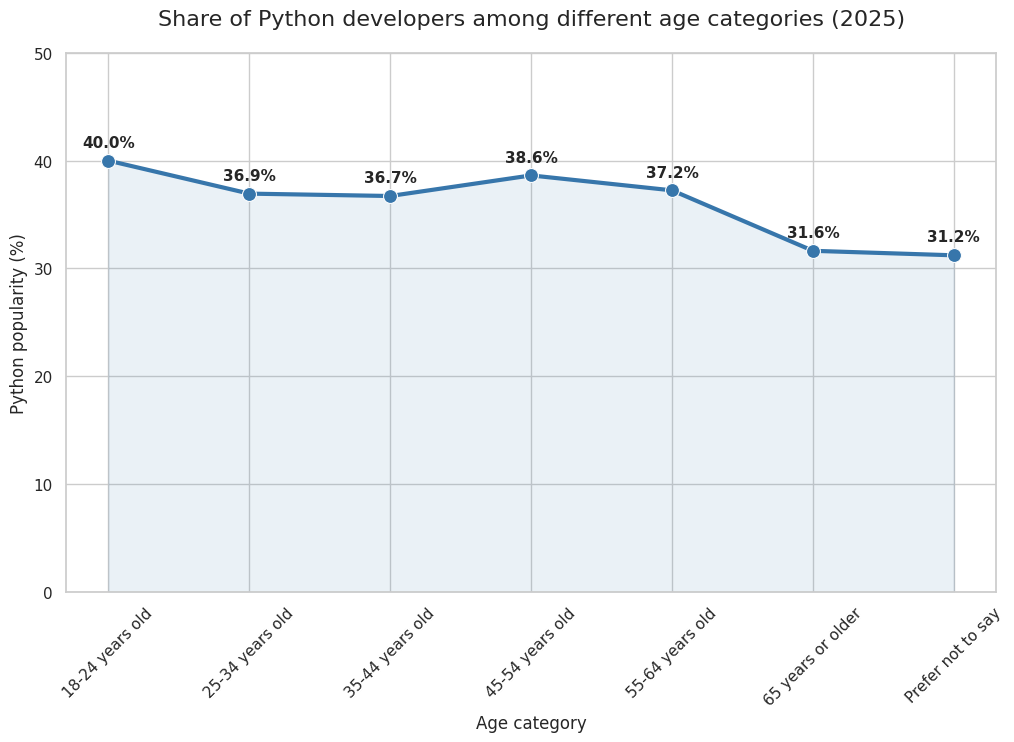

In [26]:
# Create a checkbox column: True if Python is in the language list
srp_df['UsesPython'] = srp_df['LanguageHaveWorkedWith'].str.contains('Python', na=False)

# Group by age and calculate the percentage (average of Boolean values ​​* 100)
age_python_stats = srp_df.groupby('Age')['UsesPython'].mean().sort_index() * 100

# Determine the correct order of age categories (optional if they are not sorted)
# Usually in a survey they go from youngest to oldest.
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

# Filter existing categories to avoid errors if one does not exist
age_order = [age for age in age_order if age in age_python_stats.index]
age_python_stats = age_python_stats.reindex(age_order)

# Visualization
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

# Create a line graph with markers (it shows the trend better)
ax = sns.lineplot(x=age_python_stats.index, y=age_python_stats.values,
                  marker='o', markersize=10, linewidth=3, color='#3776AB') # Python logo color

# Add a fill under the line for effect
plt.fill_between(age_python_stats.index, age_python_stats.values, color='#3776AB', alpha=0.1)

# Add value labels near the points
for x, y in zip(age_python_stats.index, age_python_stats.values):
    plt.text(x, y + 1, f'{y:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Share of Python developers among different age categories (2025)', fontsize=16, pad=20)
plt.xlabel('Age category', fontsize=12)
plt.ylabel('Python popularity (%)', fontsize=12)
plt.ylim(0, max(age_python_stats.values) + 10) # Add margin at the top for signatures
plt.xticks(rotation=45)

plt.savefig('python_popularity_by_age.png', dpi=300, bbox_inches='tight')
plt.show()

5.0* Analysis of industries among high-paid remote workers

In [28]:
# Convert to numeric format and calculate the 75th percentile
srp_df["ConvertedCompYearly"] = pd.to_numeric(srp_df["ConvertedCompYearly"], errors="coerce")

# Calculating the 75th percentile of compensation
perc75 = salary_df_cleaned["ConvertedCompYearly"].dropna().quantile(0.75)

# We filter respondents by high compensation and remote work format
high_paid_remote = salary_df_cleaned[
    (salary_df_cleaned["ConvertedCompYearly"] > perc75) &
    (salary_df_cleaned["RemoteWork"].str.contains("remote", case=False, na=False))
]

# We count industries (we allow for multiple values ​​because of ;)
srp_industries = (
    high_paid_remote["Industry"]
    .dropna()
    .str.split(";")
    .explode()
    .str.strip()
    .value_counts()
)

# We output the result
print("The most common industries among high-paid remote workers:")
srp_industries_df = srp_industries.reset_index()
srp_industries_df.columns = ["Industry", "Quantity"]
srp_industries_df

The most common industries among high-paid remote workers:


,Industry,Quantity
0,Software development,1448
1,Other:,257
2,Fintech,243
3,Healthcare,233
4,"Internet, telecomm or information services",182
5,Banking/financial services,148
6,Government,116
7,Retail and consumer services,95
8,Media & advertising services,94
9,Computer systems design and services,87


In [29]:
# Saving the result to a CSV file
srp_industries_df.to_csv('high_paid_remote_industries.csv', index=False, encoding='utf-8-sig')

print("File successfully saved as 'high_paid_remote_industries.csv'")

File successfully saved as 'high_paid_remote_industries.csv'


**Main Conclusions**  
**1.Data Completeness and Survey Structure**  
• **Result:** Out of 49,191 respondents, none (0) answered all questions.  
• **Conclusion:** This confirms the huge size of the questionnaire and the presence of complex logic (skip logic), where certain blocks of questions appear only for specific roles.  
This indicator is the norm for Stack Overflow and indicates a high specificity of answers in different technology segments.  
**2. Work Experience (WorkExp) and Market Maturity**  
• **Statistics:** Mean value — 13.37 years, Median and Mode — 10.0 years.  
• **Conclusion:** The labor market has a very stable core of experienced professionals with 10 years of experience. Since the mean value (13.37) is higher than the median, we observe a “long tail” of industry veterans (30+ years of experience) who shift the mean upwards, creating a positive asymmetry in the data.
**3. Remote Work Culture and Flexibility**  
• **Result:** 17,663 respondents work completely remotely.  
• **Conclusion:** Remote work remains the dominant standard. Considering the total number of respondents, almost one in three surveys confirms the industry’s transition to a decentralized work model, where the geographical location of the office loses its critical role.  
**4. Educational Shift: Courses vs. Diplomas**  
• **Result:** 21,212 people (~43% of the total) used online courses for training.  
• **Conclusion:** Online platforms (Coursera, Udemy, etc.) have officially become mainstream. The fact that almost half of the community relies on self-education indicates a paradigm shift: skills-first is now more important for developers than traditional university education.  
**5. Anomaly Handling and Financial Data Quality**  
• **Result:** A separate dataset salary_outliers.csv was generated for further study.  
• **Conclusion:** The analysis revealed a significant number of extreme values ​​(for example, salaries < 1,000 usd. or > 800,000 usd. per year in atypical regions). Excluding these anomalies allowed us to obtain a realistic picture of the market, protected from input errors and humorous answers.  
**6. Sectoral analysis of high-paying remote work**  
• **Statistics:** The leader is Software Development (1,448 people), but a significant share is occupied by Fintech (243) and Healthcare (233).  
• **Conclusion:** High-paying Remote is no longer the prerogative of only IT companies. Conservative sectors (banking, medicine) are forced to offer competitive conditions and a remote format to attract top-level talent.  
**7. Geography of Python Compensation**  
• **Statistics:** For example, the median in Pakistan is $8,428, while in developed countries it is ten times higher.  
• **Conclusion:** Globalization through Remote Work creates a unique chance for developers from countries with low median income to enter the global market. The huge gap in the numbers emphasizes the economic attractiveness of the programming profession in developing countries.  

**Contact:** | **Name:** Andrii Isachenko | **LinkedIn:** [Andrii Isachenko](https://www.linkedin.com/in/isachenko-andrii/) | **E-mail:** isao.datastudio@gmail.com